In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
df = pd.read_pickle('../data/p_comment.pkl.zip')
df1 = pd.read_csv('../data/p_content.csv')
result = pd.merge(df, df1, on="ID_GodotObject")[['ID_Posting', 'publishingDate', 'ID_GodotObject']]
result['publishingDate'] = pd.to_datetime(result['publishingDate'])
result['month'] = result['publishingDate'].dt.month
result['year'] = result['publishingDate'].dt.year
print(result.shape)
result.head()

(365552, 5)


,ID_Posting,publishingDate,ID_GodotObject,month,year
0,1050281479,2020-02-26 16:50:27,2000115059032,2,2020
1,1050282668,2020-02-26 16:50:27,2000115059032,2,2020
2,1050289373,2020-02-26 16:50:27,2000115059032,2,2020
3,1050290719,2020-02-26 16:50:27,2000115059032,2,2020
4,1050293953,2020-02-26 16:50:27,2000115059032,2,2020


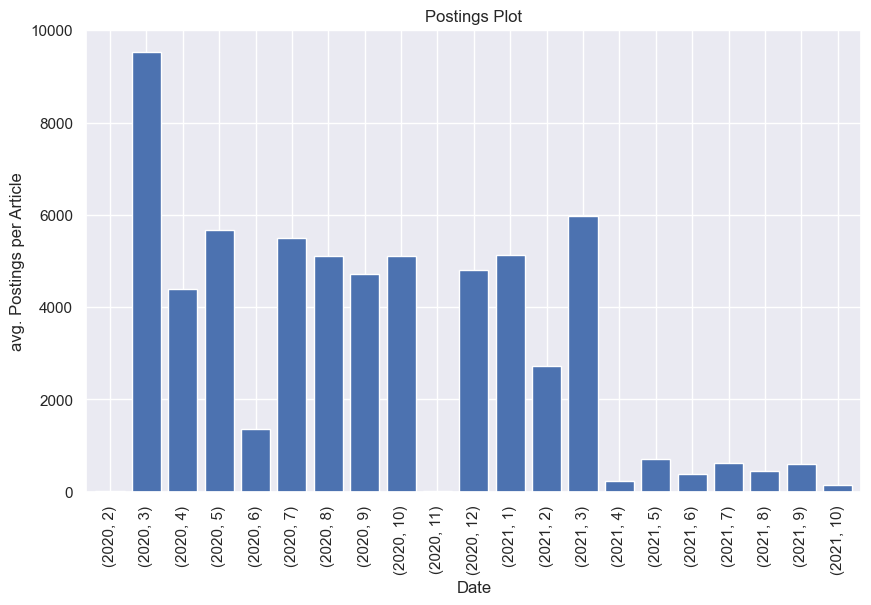

year  month
2020  2            7
      3        38134
      4        35123
      5        34091
      6         2719
Name: ID_Posting, dtype: int64
year  month
2020  2        1
      3        4
      4        8
      5        6
      6        2
Name: ID_GodotObject, dtype: int64


In [3]:
postings = result.groupby(['year','month'])['ID_Posting'].count()
articles = result.groupby(['year','month'])['ID_GodotObject'].nunique()
# Divide the number of postings by the number of articles to get the ratio of postings to articles
ratio = postings / articles

# Plot the ratio as a bar chart
ratio.plot.bar(figsize=(10,6), width=0.8)

# Add a title and axis labels
plt.title('Postings Plot')
plt.xlabel('Date')
plt.ylabel('avg. Postings per Article')

# Show the plot
plt.savefig('postings_per_article.png', bbox_inches='tight', dpi=300)
plt.show()

print(postings.head())
print(articles.head())

In [4]:
#find viral article groups
df2 = pd.read_csv('../data/feature/knn_clustering.csv')
result1 = pd.merge(result, df2, on="ID_GodotObject")
print(result1.shape)
result1.head()

(365552, 6)


,ID_Posting,publishingDate,ID_GodotObject,month,year,cluster_value
0,1050281479,2020-02-26 16:50:27,2000115059032,2,2020,6
1,1050282668,2020-02-26 16:50:27,2000115059032,2,2020,6
2,1050289373,2020-02-26 16:50:27,2000115059032,2,2020,6
3,1050290719,2020-02-26 16:50:27,2000115059032,2,2020,6
4,1050293953,2020-02-26 16:50:27,2000115059032,2,2020,6


year  month  cluster_value
2020  2      6                    7.0
      3      1                21874.0
             3                  321.0
             4                  813.0
             5                15126.0
dtype: float64
year  month  cluster_value
2020  2      6                    7
      3      1                21874
             3                  321
             4                  813
             5                15126
Name: ID_Posting, dtype: int64
year  month  cluster_value
2020  2      6                1
      3      1                1
             3                1
             4                1
             5                1
Name: ID_GodotObject, dtype: int64


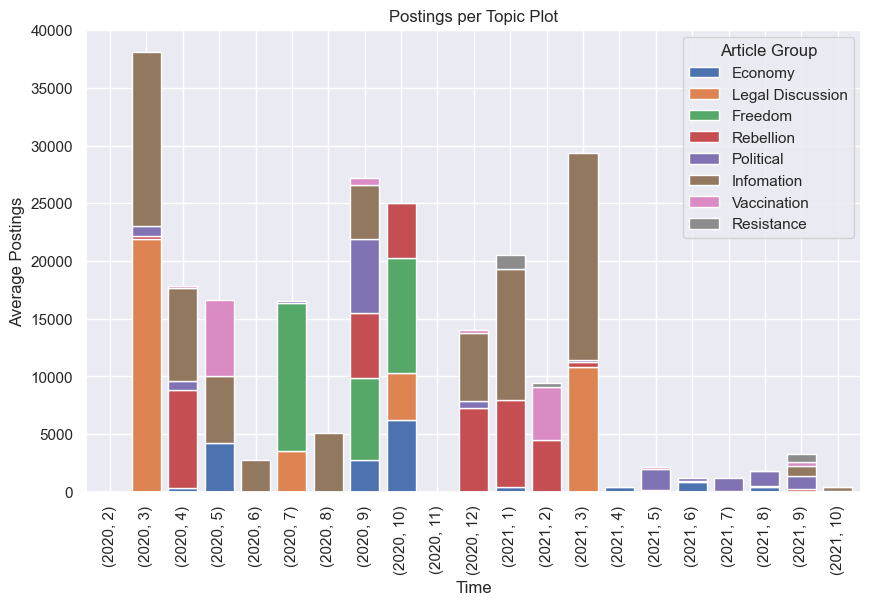

In [46]:
postings = result1.groupby(['year','month','cluster_value'])['ID_Posting'].count()
articles = result1.groupby(['year','month', 'cluster_value'])['ID_GodotObject'].nunique()
# Divide the number of postings by the number of articles to get the ratio of postings to articles
ratio = postings / articles

print(ratio.head())
print(postings.head())
print(articles.head())

df_gb = ratio.unstack()
df_gb.plot(kind='bar', stacked=True, figsize=(10,6), width=0.8)
# Get the legend object
legend = plt.legend(['Economy', 'Legal Discussion','Freedom', 'Rebellion','Political', 'Infomation','Vaccination', 'Resistance'])
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# Change the legend title
legend.set_title('Article Group')
# Add a title to the plot
plt.title('Postings per Topic Plot')
plt.xlabel('Time')
plt.ylabel('Average Postings')

# Show the plot
plt.savefig('cluster-dist-plot.png', bbox_inches='tight', dpi=300)
plt.show()

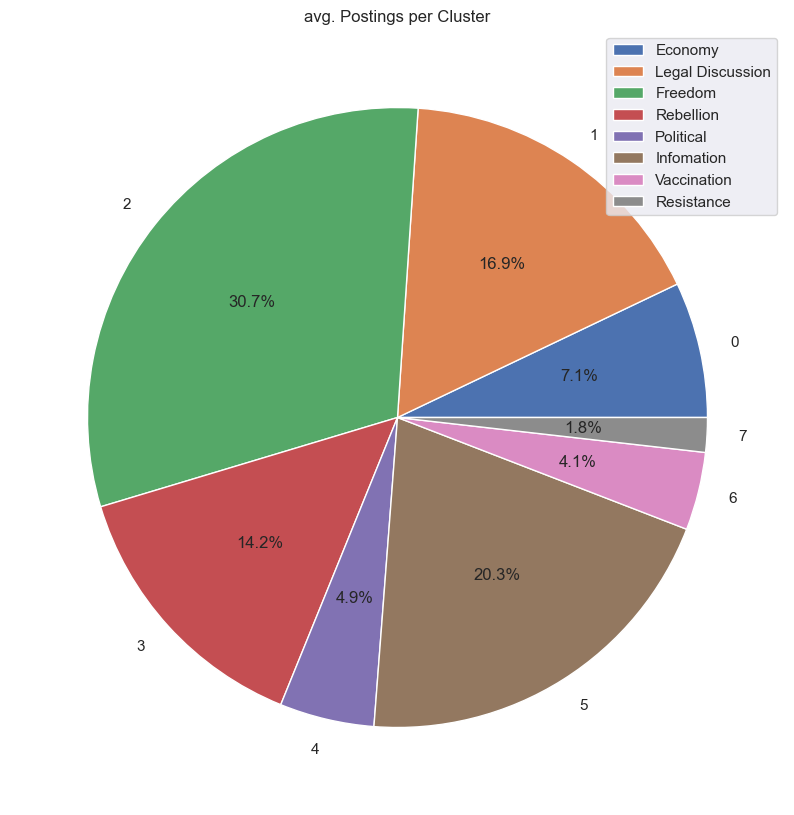

In [18]:
#Plot to see which category got the most postings
#fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))
result2 = result1.copy()
postings = result2.groupby('cluster_value')['ID_Posting'].nunique()
articles = result1.groupby('cluster_value')['ID_GodotObject'].nunique()
# Divide the number of postings by the number of articles to get the ratio of postings to articles
ratio = postings / articles

plt.figure(figsize=(10,15))
# Create a pie chart
plt.pie(ratio.values, labels=grouped_df.index, autopct='%1.1f%%')
plt.legend(['Economy', 'Legal Discussion','Freedom', 'Rebellion','Political', 'Infomation','Vaccination', 'Resistance'])
plt.title('avg. Postings per Cluster')
plt.savefig('cluster-pie-plot.png', bbox_inches='tight', dpi=300)
plt.show()

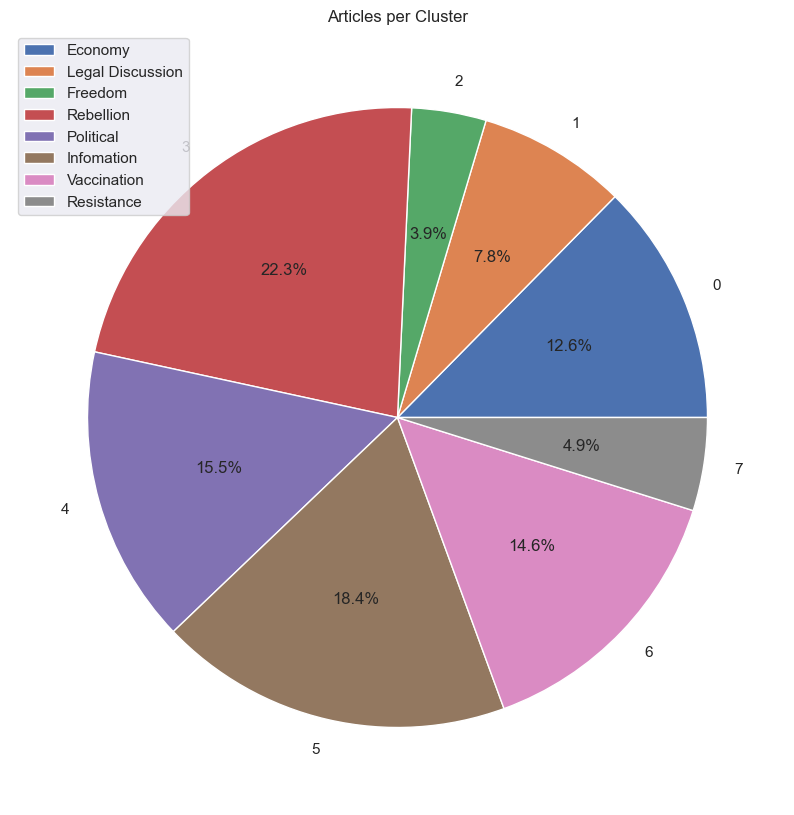

In [7]:
result2 = result1.copy()
grouped_df = result2.groupby('cluster_value')['ID_GodotObject'].nunique()
plt.figure(figsize=(10,15))
# Create a pie chart
plt.pie(grouped_df.values, labels=grouped_df.index, autopct='%1.1f%%')
plt.legend(['Economy', 'Legal Discussion','Freedom', 'Rebellion','Political', 'Infomation','Vaccination', 'Resistance'])
plt.title('Articles per Cluster')
plt.show()

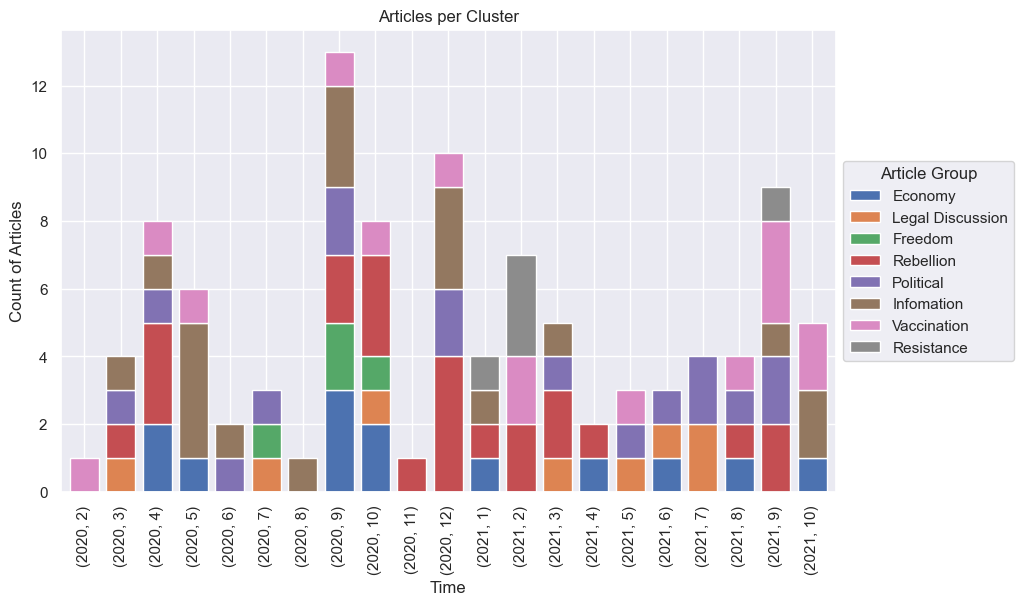

In [57]:
result4 = pd.merge(df1[['ID_GodotObject', 'publishingDate']],df2, on='ID_GodotObject')

# convert the publishingDate column to datetime type
result4['publishingDate'] = pd.to_datetime(result4['publishingDate'])
result4['month'] = result4['publishingDate'].dt.month
result4['year'] = result4['publishingDate'].dt.year

articles = result4.groupby(['year','month', 'cluster_value'])['ID_GodotObject'].nunique()
# Divide the number of postings by the number of articles to get the ratio of postings to articles

df_gb = articles.unstack()
df_gb.plot(kind='bar', stacked=True, figsize=(10,6), width=0.8)
# Get the legend object
legend = plt.legend(['Economy', 'Legal Discussion','Freedom', 
                     'Rebellion','Political', 'Infomation','Vaccination', 'Resistance'],
                   loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_alpha(0.1)
# Change the legend title
legend.set_title('Article Group')
# Add a title to the plot
plt.title('Articles per Cluster')
plt.xlabel('Time')
plt.ylabel('Count of Articles')

# Show the plot
plt.savefig('cluster-article-dist-plot.png', bbox_inches='tight', dpi=300)
plt.show()

In [58]:
articles = result4.groupby(['cluster_value'])['ID_GodotObject'].nunique()
print(result4.shape)
articles

(103, 5)


cluster_value
0    13
1     8
2     4
3    23
4    16
5    19
6    15
7     5
Name: ID_GodotObject, dtype: int64

In [59]:
postings = result1.groupby(['cluster_value'])['ID_Posting'].nunique()
print(result1.shape)
postings

(365552, 6)


cluster_value
0     27775
1     40671
2     37055
3     98536
4     23812
5    116582
6     18405
7      2716
Name: ID_Posting, dtype: int64

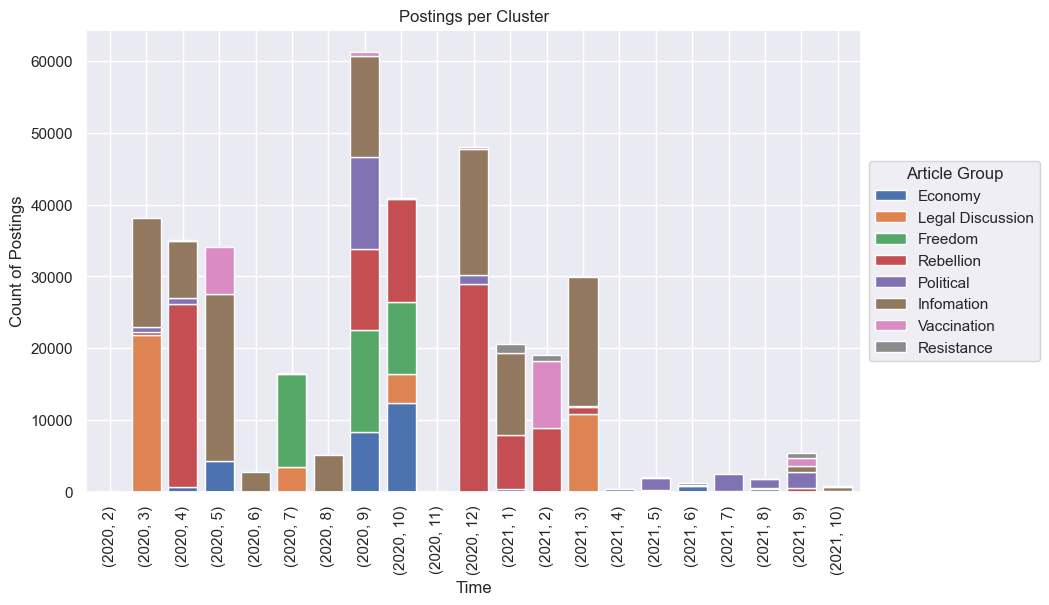

In [56]:

postings = result1.groupby(['year','month', 'cluster_value'])['ID_Posting'].nunique()
# Divide the number of postings by the number of articles to get the ratio of postings to articles

df_gb = postings.unstack()
df_gb.plot(kind='bar', stacked=True, figsize=(10,6), width=0.8)
# Get the legend object
legend = plt.legend(['Economy', 'Legal Discussion','Freedom', 
                     'Rebellion','Political', 'Infomation','Vaccination', 'Resistance'],
                   loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_alpha(0.1)
# Change the legend title
legend.set_title('Article Group')
# Add a title to the plot
plt.title('Postings per Cluster')
plt.xlabel('Time')
plt.ylabel('Count of Postings')

# Show the plot
plt.savefig('cluster-postings-dist-plot.png', bbox_inches='tight', dpi=300)
plt.show()